# **Klinkenberg Effect**


In gas permeability measurements, the observed permeability value is often higher than the actual (or absolute) permeability due to the gas slippage effect, especially at low pressures. This phenomenon is known as the Klinkenberg Effect.

                         k_g = k_l + c.(1/m_p)
            

where :

  k_l = absolute (liquid equivalent) permeability (md)

  k_g = measured gas permeability (md)

  m_p = mean pore pressure (psia)

  c = correction factor (slope of the line when plotting k_g vs 1/m_p)
   
The correction factor c is related to k_l by:

                           c = 6.9.k_l^0.36
Substituting this into the main equation and rearranging gives a nonlinear equation:

                     f(k_l)=6.9.(k_l)^0.64+Pm(k_l−k_g)

  This equation is used when only a single measurement of gas permeability k_g is avaliable to at a specific pressure m_p, and we want to estimate the absolute permeability k_l.

**Numerical Method: Newton-Raphson Iteration**

Since the equation is nonlinear, we solve it using the Newton-Raphson method, which is an iterative approach used to find the roots of equations.

The general iteration formula is:

                       k(i+1) = k(i) - f(ki)/f'(ki)

 Where:

 k(i) = initial guess of the absolute permeability, md

 k(i+1) = new permeability value to be used for the next iteration

 f(ki) = function defined from the nonlinear equation

 f'(ki) = first-derivative of the function

 For this case:
    
                 f(k_l)=6.9.(k_l)^0.64+Pm(k_l−k_g)

                  f′(k_l)=4.416(k_l)−0.36+m_p

          
                

**Procedure :**

*   Choose an initial guess for absolute permeability k_l
*   Use the Newton-Raphson formula to compute the next value
*   Repeat the process until the function f(k) becomes close to zero (within   a small error margin), or the changes in k become negligible.
*   The final value of k_l will be the corrected absolute permeability, accounting for the Klinkenberg effect.





Enter your first guess of absolute permeability k_l (in md): 100
Enter Mean Pressure m_p (in psia): 2.152
Enter K(air) = k_g (in md): 46.6

 The final value of permeability k_l (at infinite mean pressure) is: 22.848969848793512 md


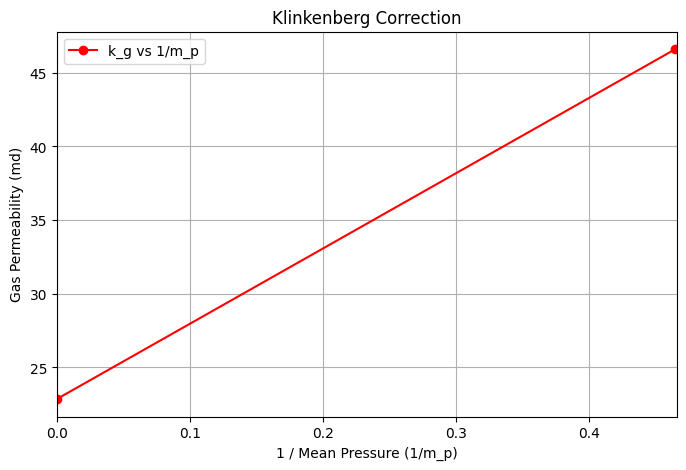

In [28]:
import matplotlib.pyplot as plt

def klinkenberg():
    #Inputs
    k_l = float(input("Enter your first guess of absolute permeability k_l (in md): "))
    m_p = float(input("Enter Mean Pressure m_p (in psia): "))
    k_g = float(input("Enter K(air) = k_g (in md): "))

    #Newton-Raphson iteration
    while abs(6.9 * (k_l ** 0.64) + m_p * k_l - m_p * k_g) > 0.01:
        f_k = 6.9 * (k_l ** 0.64) + m_p * k_l - m_p * k_g
        f_prime_k = 4.416 * (k_l ** -0.36) + m_p
        k_l = k_l - (f_k / f_prime_k)

    #Final output
    print(f"\n The final value of permeability k_l (at infinite mean pressure) is: {k_l} md")


    # Plotting k_g vs 1/m_p
    x_vals = [0, 1 / m_p]
    y_vals = [k_l, k_g]

    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, y_vals, marker='o', color='red', label='k_g vs 1/m_p')
    plt.xlabel("1 / Mean Pressure (1/m_p)")
    plt.ylabel("Gas Permeability (md)")
    plt.title("Klinkenberg Correction")
    plt.grid(True)
    plt.legend()
    plt.xlim(0, (1 / m_p) + 0.001)
    plt.show()

klinkenberg()
